In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.models import mfx
from lcls_beamline_toolbox.xraywavetrace import beam

Can't find epics package. PPM_Imager class will not be supported


In [2]:
# first argument is photon energy, N is a sampling parameter. 
# The wavefront propagation happens on a NxN grid - will affect the resolution of the result.
# Using a GPU will help a lot for N>~256

mfx_sim = mfx.MFX(9500,N=512)

# ax and/or ay arguments for undulator pointing. These are in units of radians, and based on my understanding, the pivot point of the rotation is about
# the upstream end of the undulators about 100m upstream of the undulator exit.
# mfx_sim.undulator_pointing(ax=1e-6,ay=1e-6)

In [3]:
# random misalignment of all the transfocator lenses
for i in range(9):
    getattr(mfx_sim,'tfs_{}_x'.format(i+2)).mvr(2*(np.random.rand(1)-0.5)*50e-6)
    getattr(mfx_sim,'tfs_{}_y'.format(i+2)).mvr(2*(np.random.rand(1)-0.5)*50e-6)


# set limits
mfx_sim.tfs_z.set_low_limit(-.5)
mfx_sim.tfs_z.set_high_limit(.5)
# mfx_sim.tfs_9_y.mvr(-50e-6)

# test limit
# mfx_sim.tfs_z.mv(0.6)
# # still zero since it doesn't move outside limit
# print(mfx_sim.tfs_z.wm())

# # move within limits (relative move)
# mfx_sim.tfs_z.mvr(.1)
# print(mfx_sim.tfs_z.wm())

In [4]:
mfx_sim.tfs_9_x.position

array([9.17352075e-06])

In [5]:
# check which crls are in use
for num, crl in enumerate(mfx_sim.tfs_list):
    # if num>5:
    #     crl.enable()
    # else:
    #     crl.disable()
    print('crl {} ({}um ROC) inserted: {}'.format(crl.name,crl.roc*1e6,crl.enabled))

crl tfs_2 (500.0um ROC) inserted: True
crl tfs_3 (300.0um ROC) inserted: False
crl tfs_4 (250.0um ROC) inserted: False
crl tfs_5 (200.0um ROC) inserted: False
crl tfs_6 (125.0um ROC) inserted: True
crl tfs_7 (62.5um ROC) inserted: False
crl tfs_8 (50.0um ROC) inserted: False
crl tfs_9 (50.0um ROC) inserted: True
crl tfs_10 (50.0um ROC) inserted: False


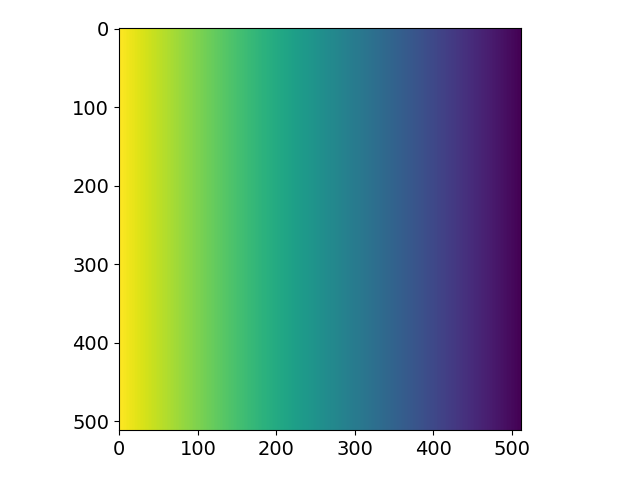

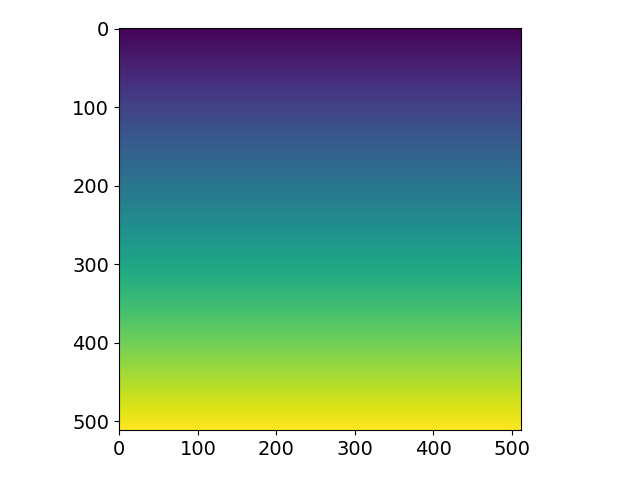

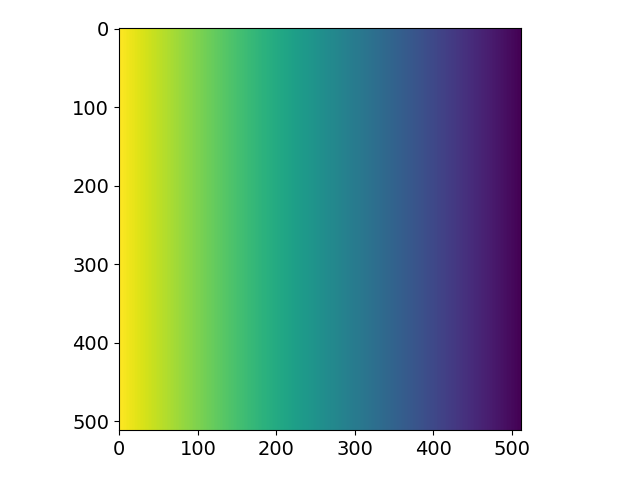

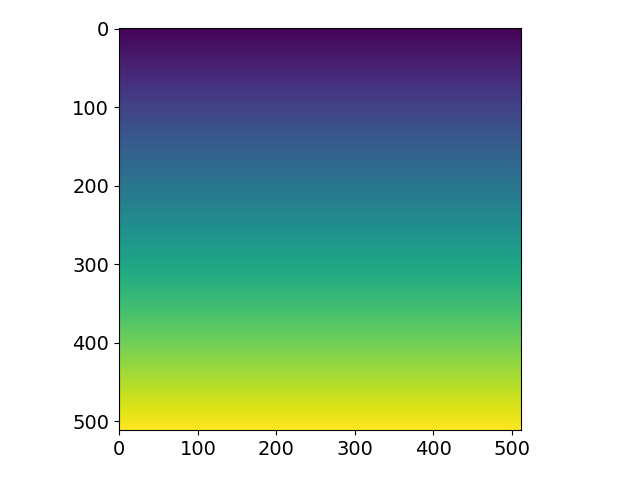

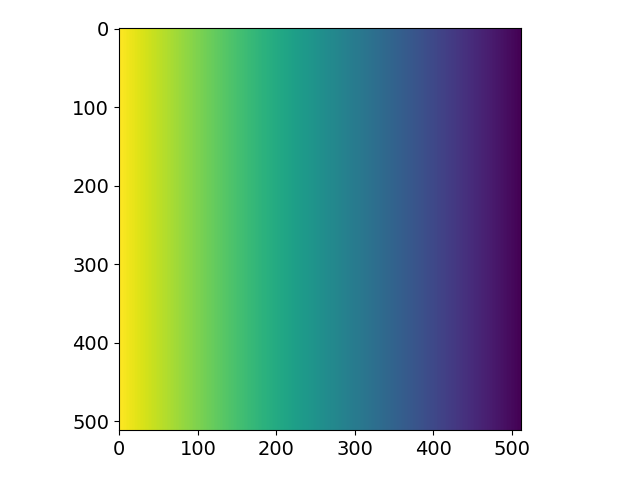

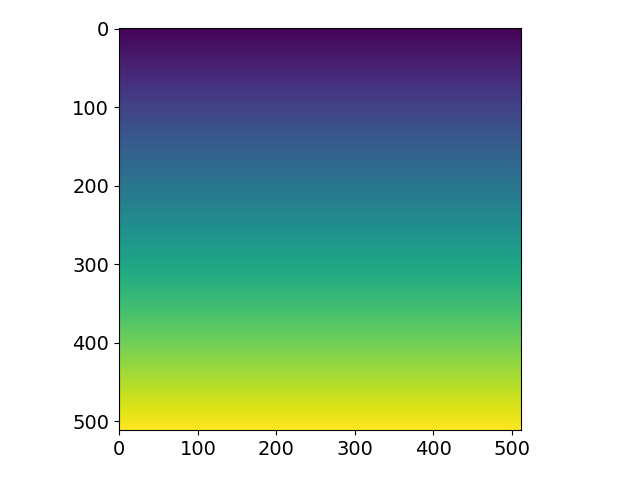

In [6]:
# run the simulation
mfx_sim.propagate()

[<Axes: title={'center': 'DG3_YAG'}, xlabel='X coordinates (microns)', ylabel='Y coordinates (microns)'>,
 <Axes: >,
 <Axes: >]

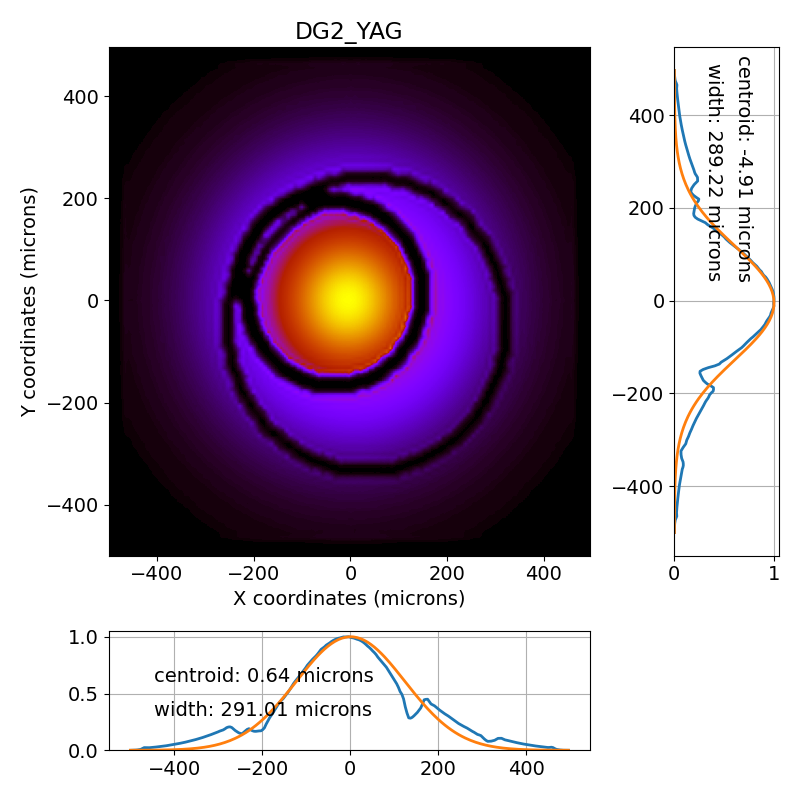

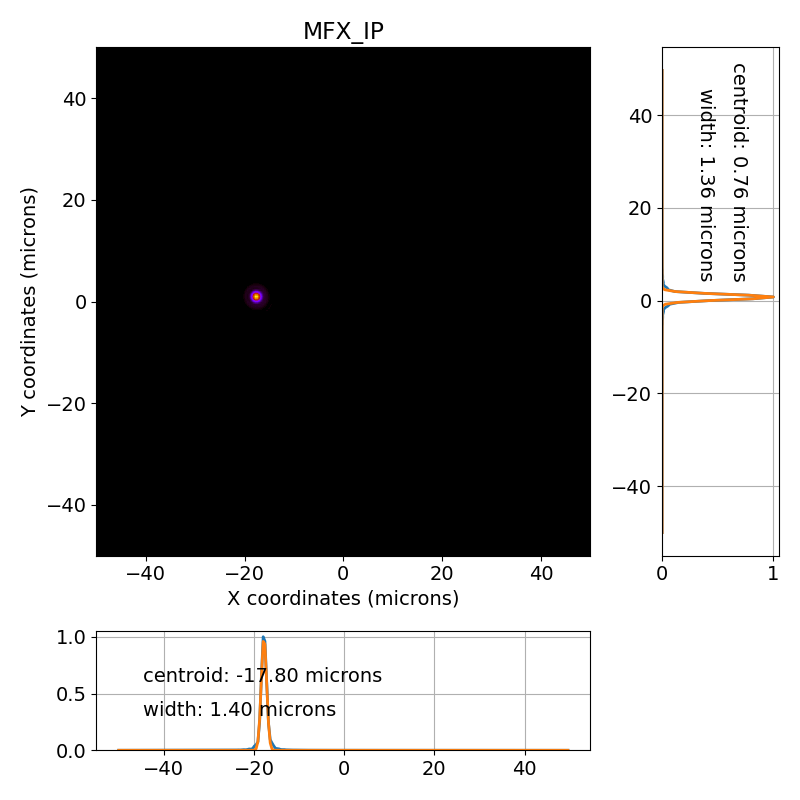

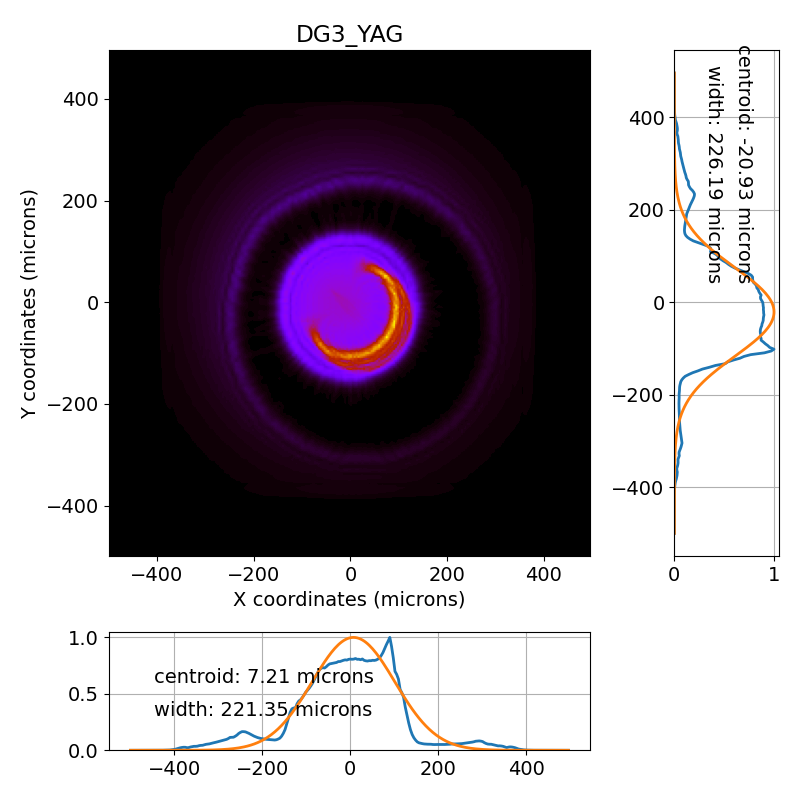

In [12]:
# display results
mfx_sim.beamline.DG2_YAG.view_beam()
mfx_sim.beamline.MFX_IP.view_beam()
mfx_sim.beamline.DG3_YAG.view_beam()

In [7]:
import time

In [8]:
beam_params = {
            'photonEnergy': 9500,
            'N': 512,
            'sigma_x': 30e-6,
            'sigma_y': 30e-6,
            'rangeFactor': 5,
            'scaleFactor': 10,
            'z_source': 650 - 26
        }

pulse_test = beam.Pulse(beam_params=beam_params, tau=.05, time_window=.5)

start = time.time()

pulse_test.propagate(beamline=mfx_sim.beamline, screen_names=['DG2_YAG','MFX_IP','DG3_YAG'],cores=8)

end = time.time()

Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.02107691764831543 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.018951892852783203 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
IM2L0 in 0.01404428482055664 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
IM2L0 in 0.011262893676757812 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
drift2 in 0.016338109970092773 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.000000e+00
drift2 in 0.020476818084716797 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.000000e+00
Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.02006220817565918 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
IM2L0 in 0.01160287857055664 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
xhat: [ 0.99999118  0.         -0.00419999]
yhat

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))


nan
Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.015758752822875977 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
attempting interpolation
attempting interpolation
IM2L0 in 0.05405879020690918 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
drift2 in 0.08048629760742188 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.000000e+00
attempting interpolation
Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.1120920181274414 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
xhat: [ 0.99999118  0.         -0.00419999]
yhat: [0. 1. 0.]
zhat: [0.00419999 0.         0.99999118]
dk: [ 8.67361738e-19 -3.75643888e-21  1.11022302e-16]
is beam in the correct direction?
attempting interpolation
nan
IM2L0 in 0.03947305679321289 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
drift2 in 0.03913617134094238 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.0

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))


nan
drift2 in 0.042513132095336914 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.000000e+00
attempting interpolation
Can't find epics package. PPM_Imager class will not be supported
drift1 in 0.030364990234375 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
IM2L0 in 0.013726949691772461 seconds
zx: 111.990000
zy: 111.990000
azimuth 0.00 mrad
drift2 in 0.09017300605773926 seconds
zx: 116.000000
zy: 116.000000
azimuth 0.00 mrad
ax: 0.000000e+00
ay: 0.000000e+00
xhat: [ 0.99999118  0.         -0.00419999]
yhat: [0. 1. 0.]
zhat: [0.00419999 0.         0.99999118]
dk: [8.67361738e-19 0.00000000e+00 1.11022302e-16]
is beam in the correct direction?
nan


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:514: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global)))


attempting interpolation
xhat: [ 0.99999118  0.         -0.00419999]
yhat: [0. 1. 0.]
zhat: [0.00419999 0.         0.99999118]
dk: [8.67361738e-19 0.00000000e+00 1.11022302e-16]
is beam in the correct direction?
nan
attempting interpolation
attempting interpolation
finished Delaunay in 3.0014401250000002 seconds
finished Delaunay in 3.0216334170000003 seconds
finished Delaunay in 3.172335917 seconds
finished Delaunay in 3.072666 seconds
finished Delaunay in 3.015025625 seconds
finished Delaunay in 3.016051791999999 seconds
finished Delaunay in 3.2091108750000004 seconds
finished Delaunay in 3.046890458999999 seconds
finished interp in 2.841782083999999 seconds
finished interp in 2.8527644169999995 seconds
finished interp in 2.7411424999999987 seconds
finished interp in 2.983760375000001 seconds
finished interp in 2.944743708 seconds
finished interp in 2.9715138749999994 seconds
finished interp in 3.1127843749999986 seconds
finished interp in 3.3720012500000003 seconds
new z: 116.409974

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))


2.4336733592789825e-10
change in beam center
1.3385203523739303e-10
is beam in the correct direction?
0.0021000002433592736
0.0
[ 2.09999846e-03 -3.75643888e-21  9.99997795e-01]
[[[ 4.19998765e-03]]

 [[-3.75643888e-21]]

 [[ 9.99991180e-01]]]
[[[ 2.30999321e-03]]

 [[-4.37812952e-19]]

 [[ 7.40549995e+02]]]
global_x: 0.00
global_y: -0.00
global_z: 740.55
(512, 512)
(512, 512)
MR1L0 in 24.640639305114746 seconds
zx: 114.900000
zy: 114.900000
azimuth 4.20 mrad
drift3 in 0.034034013748168945 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
IM3L0 in 0.011511087417602539 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
2.408313617442823e-10
change in beam center
1.3245724943640424e-10
is beam in the correct direction?
0.0021000002408216195
0.0
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
global_x: 0.00
global_y: 0.00
global_z: 740.55
(512, 512)
(512, 512)
drift4 in 0.145223140

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))


2.434038586700023e-10
change in beam center
1.3387212274555024e-10
is beam in the correct direction?
0.0021000002434121414
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
global_x: 0.00
global_y: 0.00
global_z: 740.55
(512, 512)
(512, 512)
2.4191006041356146e-10
change in beam center
1.3305053370450778e-10
is beam in the correct direction?
0.0021000002418789755
nan
[ 2.09999846e-03 -3.75643888e-21  9.99997795e-01]
[[[ 4.19998765e-03]]

 [[-3.75643888e-21]]

 [[ 9.99991180e-01]]]
[[[ 2.30999321e-03]]

 [[-4.37812952e-19]]

 [[ 7.40549995e+02]]]
global_x: 0.00
global_y: -0.00
global_z: 740.55
(512, 512)
(512, 512)
drift3 in 0.041374921798706055 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
IM3L0 in 0.051386117935180664 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
MR1L0 in 25.72806692123413 seconds
zx: 114.900000
zy: 114.900000
azimuth 4.20 mrad
MR1L0 in 26.2090790271

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))


IM3L0 in 0.033514976501464844 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
drift4 in 0.02110910415649414 seconds
zx: 122.186063
zy: 122.186063
azimuth 4.20 mrad
MR2L0 in 25.484229803085327 seconds
zx: 121.086063
zy: 121.086063
azimuth 0.00 mrad
drift5 in 0.030445098876953125 seconds
zx: 127.359064
zy: 127.359064
azimuth 0.00 mrad
IM4L0 in 0.12532782554626465 seconds
zx: 127.359064
zy: 127.359064
azimuth 0.00 mrad
MR2L0 in 26.03215789794922 seconds
zx: 121.086063
zy: 121.086063
azimuth 0.00 mrad
drift6 in 0.02579498291015625 seconds
zx: 147.400064
zy: 147.400064
azimuth 0.00 mrad
xpp_s1 in 0.01941204071044922 seconds
zx: 147.400064
zy: 147.400064
azimuth 0.00 mrad
drift7 in 0.02133917808532715 seconds
zx: 147.800064
zy: 147.800064
azimuth 0.00 mrad
drift5 in 0.06409192085266113 seconds
zx: 127.359064
zy: 127.359064
azimuth 0.00 mrad
hx2_shared in 0.0810389518737793 seconds
zx: 147.800064
zy: 147.800064
azimuth 0.00 mrad
IM4L0 in 0.12025880813598633 seconds
zx: 127.359064
zy: 

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))


IM3L0 in 0.12297391891479492 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
drift4 in 0.021950960159301758 seconds
zx: 122.186063
zy: 122.186063
azimuth 4.20 mrad
2.405714928534786e-10
change in beam center
1.323143215464622e-10
is beam in the correct direction?
0.0021000002405572806
nan
[0.0021    0.        0.9999978]
[[[0.00419999]]

 [[0.        ]]

 [[0.99999118]]]
[[[2.30999321e-03]]

 [[0.00000000e+00]]

 [[7.40549995e+02]]]
global_x: 0.00
global_y: 0.00
global_z: 740.55
(512, 512)
(512, 512)
MR1L0 in 24.320425033569336 seconds
zx: 114.900000
zy: 114.900000
azimuth 4.20 mrad


/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraywavetrace/optics.py:816: RuntimeWarning: invalid value encountered in arccos
  print(xp.arccos(xp.dot(beam.zhat, k_f_global[:, 0, 0])))


drift3 in 0.15804290771484375 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
IM3L0 in 0.021809816360473633 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
drift4 in 0.05154299736022949 seconds
zx: 122.186063
zy: 122.186063
azimuth 4.20 mrad
2.4206070787312627e-10
change in beam center
1.3313338980726843e-10
is beam in the correct direction?
0.0021000002420375787
nan
[ 2.09999846e-03 -3.75643888e-21  9.99997795e-01]
[[[ 4.19998765e-03]]

 [[-3.75643888e-21]]

 [[ 9.99991180e-01]]]
[[[ 2.30999321e-03]]

 [[-4.37812952e-19]]

 [[ 7.40549995e+02]]]
global_x: 0.00
global_y: -0.00
global_z: 740.55
(512, 512)
(512, 512)
MR1L0 in 23.9408860206604 seconds
zx: 114.900000
zy: 114.900000
azimuth 4.20 mrad
drift3 in 0.03548073768615723 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
IM3L0 in 0.13486170768737793 seconds
zx: 120.900053
zy: 120.900053
azimuth 4.20 mrad
drift4 in 0.0406951904296875 seconds
zx: 122.186063
zy: 122.186063
azimuth 4.20 mrad
2.409525684717722e-10
ch

In [9]:
print(end-start)

316.81963205337524


(256, 256, 22)
[9407.00344678 9415.86026137 9424.71707597 9433.57389056 9442.43070515
 9451.28751974 9460.14433433 9469.00114893 9477.85796352 9486.71477811
 9495.5715927  9504.4284073  9513.28522189 9522.14203648 9530.99885107
 9539.85566567 9548.71248026 9557.56929485 9566.42610944 9575.28292403
 9584.13973863 9592.99655322]


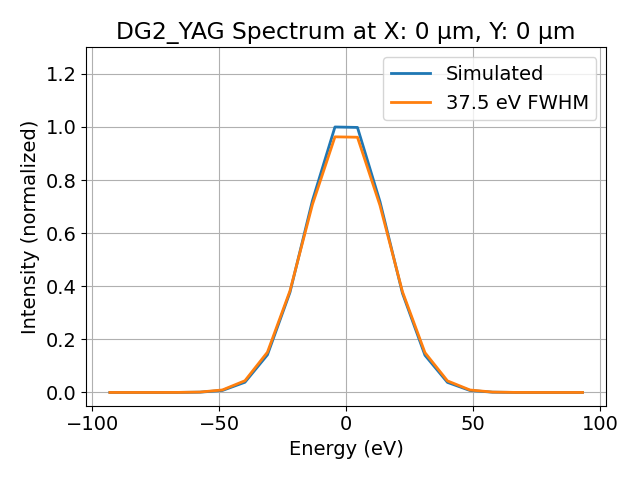

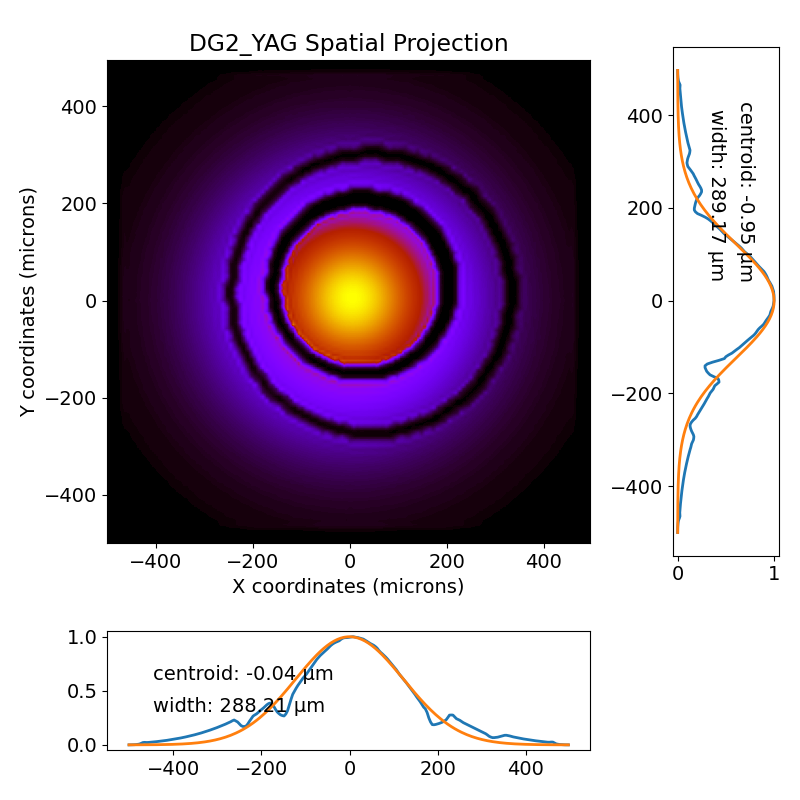

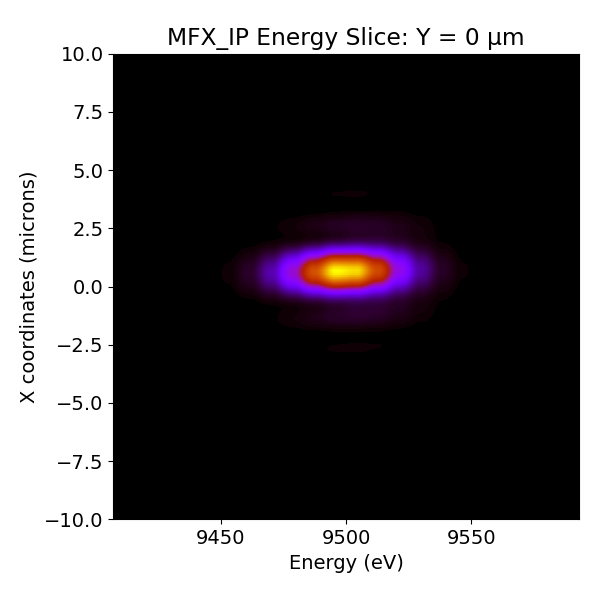

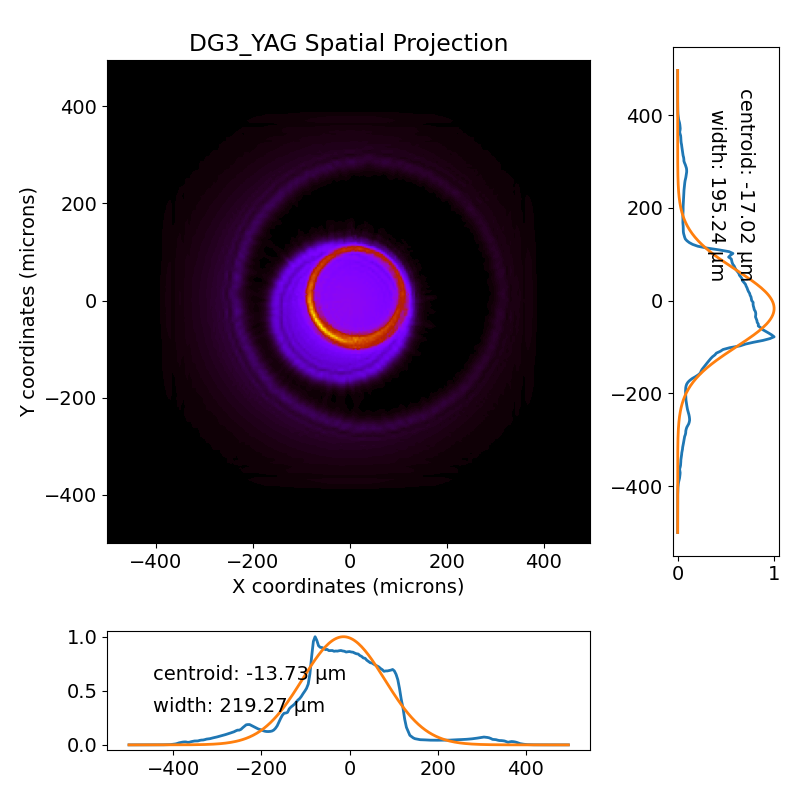

In [11]:
pulse_test.plot_spectrum('DG2_YAG')
pulse_test.imshow_projection('DG2_YAG')
pulse_test.imshow_energy_slice('MFX_IP')
pulse_test.imshow_projection('DG3_YAG')
print(np.shape(pulse_test.energy_stacks['DG2_YAG']))
print(pulse_test.energy)

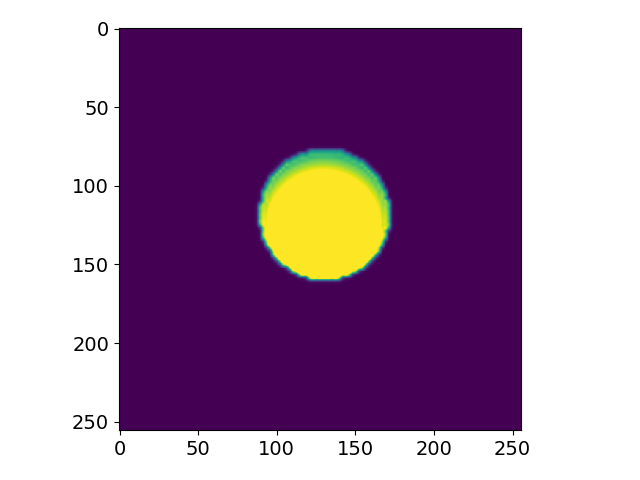

In [8]:
# access to the image array
ip_array = mfx_sim.beamline.DG2_YAG.profile
plt.figure()
plt.imshow(ip_array)
plt.clim(0,.1)